In [1]:
import jijbench as jb
import openjij as oj

In [2]:
def simple_updater(sampler, problem, ph_value, multipliers, optional_args, step, experiment):
    response = sampler(problem, ph_value, multipliers, **optional_args)
    new_mul = {k: 2*(v + 1) for k, v in multipliers.items()}
    return new_mul, optional_args, response


# QUBOコンパイルを一度だけにしたいのでSamplerに状態を持たせたい
# => なのでCallableなクラスでsamplerメソッドを作っておく.
class Sampler:
    __name__ = "sampler"
    def __init__(self):
        self.sampler = oj.SASampler()
        self.pyq_obj = None
    
    def __call__(self, problem, ph_value, multipliers, num_reads, num_sweeps=1000):
        if self.pyq_obj is None:
            # QUBOコンパイルした結果はキャッシュしておくことで再コンパイルしないようにする.
            self.pyq_obj = problem.to_pyqubo(ph_value, {}).compile()

        print(multipliers)    
        bqm = self.pyq_obj.to_bqm(feed_dict=multipliers)

        response = self.sampler.sample(bqm, num_reads=num_reads, num_sweeps=num_sweeps)
        decoded = problem.decode(response, ph_value, {})
        print(decoded.solutions[0])
        return response

In [13]:
instance_files = {
        "knapsack": [
            "../jijbench/Instances/small/knapsack/f1_l-d_kp_10_269.json"
        ]
    }

result_dir = '../jijbench/Results'

bench = jb.Benchmark(
    updater=simple_updater,
    sampler=Sampler(),
    optional_args={'num_reads': 5},
    instance_files=instance_files,
    result_dir=result_dir,
)

In [14]:
bench.run(max_iters=10)

>> instance_file = ../jijbench/Instances/small/knapsack/f1_l-d_kp_10_269.json
{'knapsack_constraint': 1}
{'x': array([0., 0., 0., 1., 1., 1., 1., 0., 0., 0.])}
{'knapsack_constraint': 4}
{'x': array([0., 1., 1., 1., 1., 0., 1., 1., 0., 1.])}
{'knapsack_constraint': 10}
{'x': array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0.])}
{'knapsack_constraint': 22}
{'x': array([0., 1., 0., 1., 1., 0., 0., 0., 0., 0.])}
{'knapsack_constraint': 46}
{'x': array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])}
{'knapsack_constraint': 94}
{'x': array([1., 0., 1., 1., 0., 1., 1., 1., 0., 0.])}
{'knapsack_constraint': 190}
{'x': array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1.])}
{'knapsack_constraint': 382}
{'x': array([0., 1., 0., 1., 0., 0., 1., 0., 1., 0.])}
{'knapsack_constraint': 766}
{'x': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}
{'knapsack_constraint': 1534}
{'x': array([0., 1., 1., 1., 1., 1., 1., 0., 1., 0.])}
../jijbench/Results/benchmark_7/logs


In [15]:
bench.experiments[0].results.result_file

'../jijbench/Results/benchmark_7/logs/f1_l-d_kp_10_269.json'

In [16]:
experiment = jb.Experiment(updater=simple_updater, sampler=Sampler(), result_dir=result_dir)
experiment.load(bench.experiments[0].results.result_file)

In [17]:
evaluator = jb.Evaluator(experiment)
evaluator.evaluate()

{'knapsack_constraint': 1}
{'x': array([1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])}
{'knapsack_constraint': 1534}
{'x': array([0., 1., 0., 1., 1., 0., 1., 0., 1., 0.])}
[({'x': array([0., 1., 0., 1., 1., 0., 1., 0., 1., 0.])}, -204., 1, -204., {'knapsack_constraint': 0.0}, {'knapsack_constraint': {(): -157.0}}, {}, {})]
{'knapsack_constraint': 1}
{'x': array([1., 1., 0., 1., 1., 0., 1., 1., 1., 0.])}
{'knapsack_constraint': 1534}
{'x': array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1.])}
[({'x': array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1.])}, -133., 1, -133., {'knapsack_constraint': 0.0}, {'knapsack_constraint': {(): -121.0}}, {}, {})]
{'knapsack_constraint': 1}
{'x': array([0., 1., 0., 1., 1., 0., 1., 0., 1., 0.])}
{'knapsack_constraint': 1534}
{'x': array([1., 0., 1., 1., 1., 0., 0., 1., 0., 0.])}
[({'x': array([1., 0., 1., 1., 1., 0., 0., 1., 0., 0.])}, -272., 1, -272., {'knapsack_constraint': 0.0}, {'knapsack_constraint': {(): -97.0}}, {}, {})]
{'knapsack_constraint': 1}
{'x': array([0

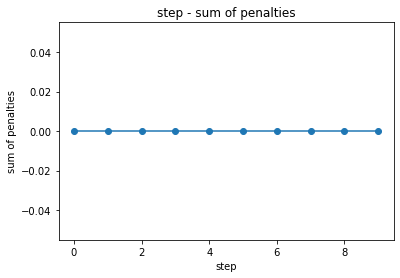

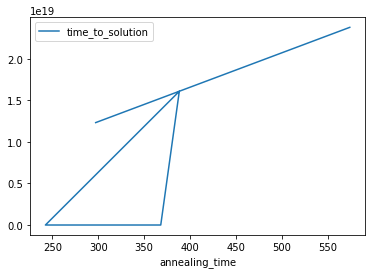

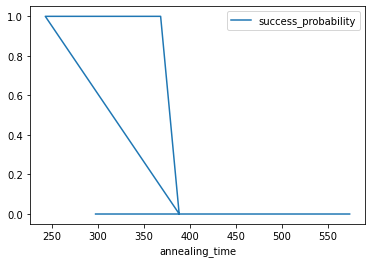

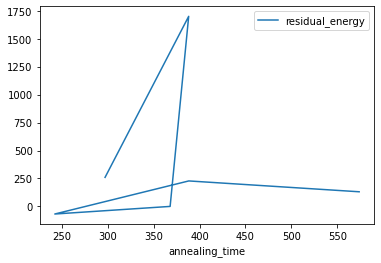

In [18]:
evaluator.plot_evaluation_metrics()